In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler

import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.ndimage import median_filter
from typing import List, Tuple
from edges_analysis import read_step
from edges_cal.xrfi import detrend_medfilt, flagged_filter, robust_divide
from edges_analysis.analysis import filters
from edges_cal.modelling import Polynomial
from edges_cal import modelling as mdl

## Total Power Filter

### Create the Filter

In [2]:
path = Path('/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/')

In [3]:
files = sorted(path.glob("*.h5"))

In [4]:
tp_aggregator = filters.TotalPowerAggregator(
    band = (50, 100)
)

In [5]:
tp_filt, info = filters.get_gha_model_filter(
    data=files[:50],
    aggregator=tp_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
    detrend_metric_model = Polynomial(n_terms=5),
    detrend_std_model = Polynomial(n_terms=5),
    detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140673940542128>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488083272>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140673940542128>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140673940542040>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-331-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140673940542128>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-332-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140673940542128>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488242752>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-298-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488242928>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-299-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488243368>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670487911416>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-332-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670487487592>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-333-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670487487944>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

### Inspect the Filter

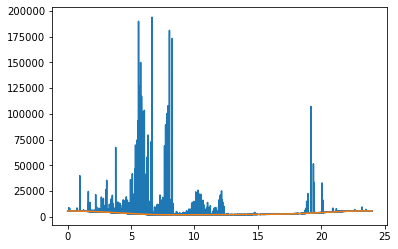

In [6]:
plt.plot(info.gha, info.metric)
plt.plot(info.gha, tp_filt.metric_model(info.gha))

(-44.81175104836802, 44.81175104836802)

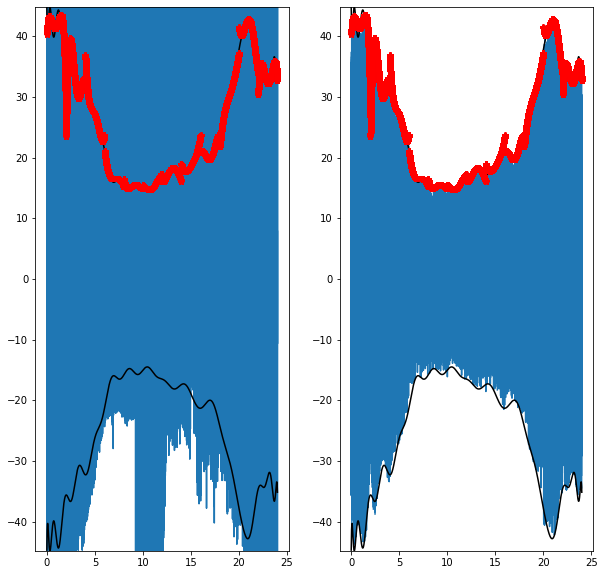

In [7]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(info.gha, info.metric - tp_filt.metric_model(info.gha))
plt.plot(info.gha, nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, -nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, nsig*info.std, 'r*')
plt.ylim((-nsig*tp_filt.std_model(info.gha)).min(), nsig*tp_filt.std_model(info.gha).max())

plt.sca(ax[1])
plt.plot(info.gha, np.where(info.flags, np.nan, info.metric - tp_filt.metric_model(info.gha)))
plt.plot(info.gha, nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, -nsig*tp_filt.std_model(info.gha), color='k')
plt.plot(info.gha, nsig*info.std, 'r*')
plt.ylim((-nsig*tp_filt.std_model(info.gha)).min(), nsig*tp_filt.std_model(info.gha).max())


Let's see how many integrations that are flagged in the iterative step are NOT flagged by the global fit:

In [8]:
np.sum(info.flags)

11286

In [9]:
np.sum(info.flags & ~tp_filt.apply_filter(info.gha, info.metric)), len(info.gha)

(242, 109057)

And vice versa:

In [10]:
np.sum(tp_filt.apply_filter(info.gha, info.metric) & ~info.flags)

255

These are less than 1% of the integrations, which is probably reasonable. 

Now look at this filter applied to other data:

In [13]:
tp_filt.std_model.parameters

array([-1.29715204e+07, -4.91297207e+07,  5.33770457e+07,  6.38158043e+06,
        5.25128717e+07,  6.54349665e+07, -5.41750318e+07, -5.59845858e+07,
        7.70216273e+07,  8.28677211e+07, -1.66702946e+07,  6.60418275e+07,
       -9.94597316e+07, -1.96529868e+07, -1.07887443e+08, -1.50933607e+08,
        6.36455551e+07, -1.03976299e+08,  2.04571109e+08,  1.72754152e+08,
       -4.68588946e+07,  4.39028730e+07, -8.05143548e+06,  1.18406496e+08,
       -2.42119852e+08, -2.68338973e+08,  1.90113632e+08,  6.14318563e+07,
        4.81614549e+07,  9.51670988e+07, -9.17824213e+07, -6.24560577e+07,
        3.09656851e+07,  1.07336114e+07, -1.77410102e+06,  5.01812493e+05,
       -4.64086725e+05, -1.85083475e+05,  4.29794117e+04,  4.85290279e+03])

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488241520>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488241608>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488241520>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

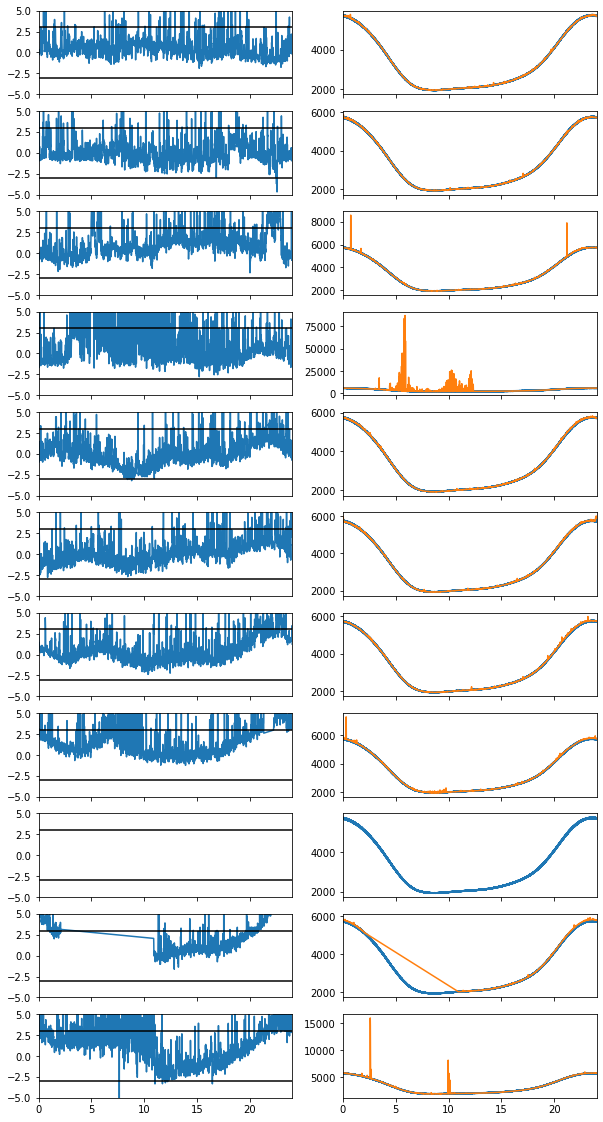

In [14]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric = tp_aggregator.aggregate([fl])
    flags = tp_filt.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - tp_filt.metric_model(gha))/tp_filt.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(info.gha, np.where(info.flags, np.nan, info.metric))
    ax[i, 1].plot(gha, metric)
    ax[i, 0].set_xlim(0, 24)
    ax[i, 1].set_xlim(0, 24)
    

The problem here is that there seems to be evolution over the course of a year or so in the total power. If instead we just use all observations to create the dataset:

### Try using all files in the filter

In [15]:
tp_filt_all, info_all = filters.get_gha_model_filter(
    data=files,
    aggregator=tp_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261584>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261496>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261584>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261496>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-339-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261584>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-340-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481262200>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481261584>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2017-018-07.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670419664128>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2017-018-23.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670419664040>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670488241432>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-293-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481262728>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-294-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481263080>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480991424>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-331-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480991512>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-332-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480992040>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481088008>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-355-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481088184>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-356-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670481088272>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480775216>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-013-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480773632>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-014-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480775656>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480878144>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-081-12.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480462160>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2017-082-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480462424>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename

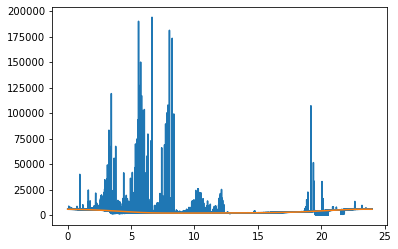

In [16]:
plt.plot(info_all.gha, info_all.metric)
plt.plot(info_all.gha, tp_filt_all.metric_model(info_all.gha))

In [17]:
np.sum(info_all.flags), len(info_all.flags)

(17886, 219307)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480599968>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670425035352>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140670480599880>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

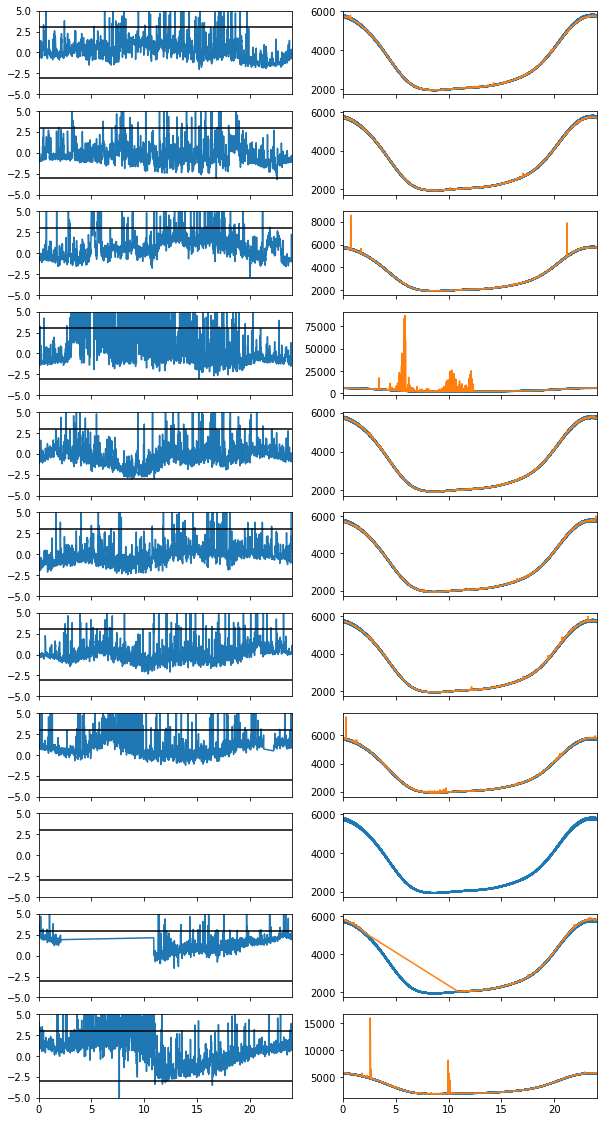

In [19]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric = tp_aggregator.aggregate([fl])
    flags = tp_filt_all.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - tp_filt_all.metric_model(gha))/tp_filt_all.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(info_all.gha, np.where(info_all.flags, np.nan, info_all.metric))
    ax[i, 1].plot(gha, metric)
    ax[i, 0].set_xlim(0, 24)
    ax[i, 1].set_xlim(0, 24)

This definitely does better at the later times, and isn't prohibitively slow.

## RMS Filter

### Create the Filter

In [8]:
rms_aggregator = filters.RMSAggregator(
    band = (50, 100),
    model_type='linlog',
    model_kwargs = {"n_terms": 5}
)

In [11]:
rms_filt, rms_info = filters.get_gha_model_filter(
    data=files[:10],
    aggregator=rms_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
    detrend_metric_model = Polynomial(n_terms=5),
    detrend_std_model = Polynomial(n_terms=5),
    detrend_gha_chunk_size=2,
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160719697880>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160719697880>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160719698320>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

### Inspect the Filter

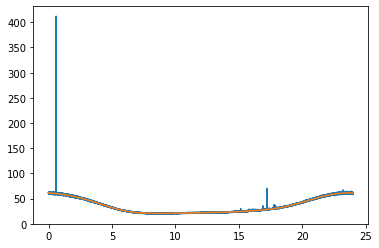

In [12]:
plt.plot(rms_info.gha, rms_info.metric)
plt.plot(rms_info.gha, rms_filt.metric_model(rms_info.gha))

(-2.452862528401738, 2.452862528401738)

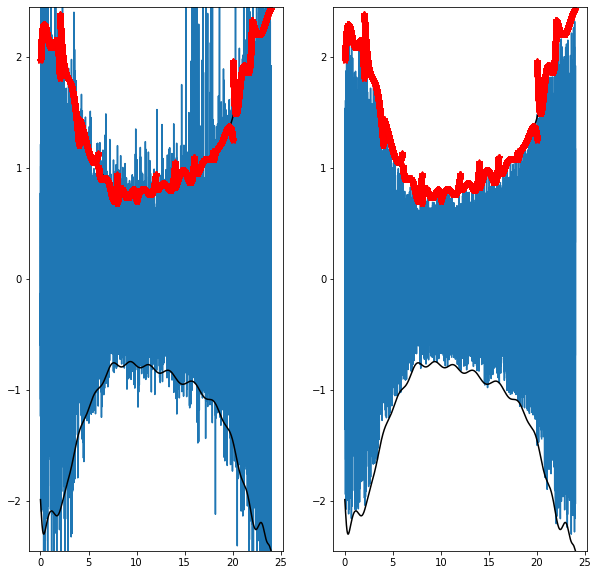

In [13]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(rms_info.gha, rms_info.metric - rms_filt.metric_model(rms_info.gha))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())

plt.sca(ax[1])
plt.plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric - rms_filt.metric_model(rms_info.gha)))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())


This is OK, but the red wiggles are a bit haphazard.

In [14]:
np.sum(rms_info.flags), len(rms_info.flags)

(556, 21084)

About 2.5% of the integrations are flagged, which is quite low!

### Try with global filter (no chunks)

In [15]:
rms_filt, rms_info = filters.get_gha_model_filter(
    data=files[:10],
    aggregator=rms_aggregator,
    metric_model_type = 'fourierday',
    std_model_type = 'fourierday',
    metric_model_kwargs = {'n_terms': 40},
    std_model_kwargs = {'n_terms': 40},
)

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160420352688>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-290-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160420352688>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-291-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160420353040>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edge

(-2.597439960602742, 2.597439960602742)

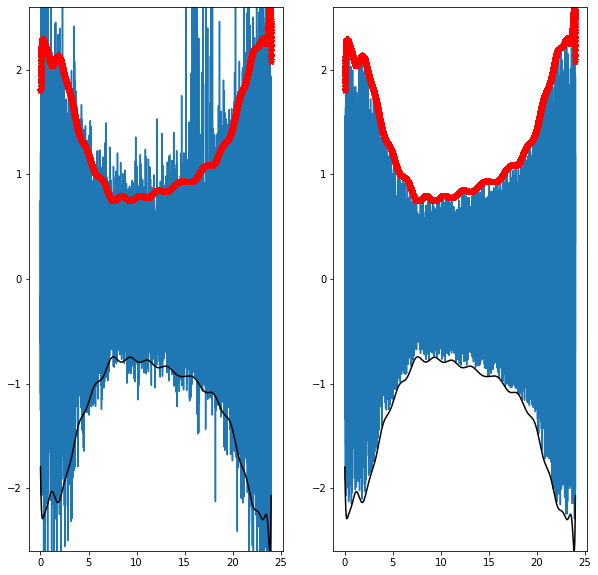

In [16]:
nsig = 3
fig, ax = plt.subplots(1,2, figsize=(10,10))
plt.sca(ax[0])
plt.plot(rms_info.gha, rms_info.metric - rms_filt.metric_model(rms_info.gha))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())

plt.sca(ax[1])
plt.plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric - rms_filt.metric_model(rms_info.gha)))
plt.plot(rms_info.gha, nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, -nsig*rms_filt.std_model(rms_info.gha), color='k')
plt.plot(rms_info.gha, nsig*rms_info.std, 'r*')
plt.ylim((-nsig*rms_filt.std_model(rms_info.gha)).min(), nsig*rms_filt.std_model(rms_info.gha).max())


In [17]:
np.sum(rms_info.flags)

574

/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160721317208>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/xrfi/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160722450656>: ['configuration', 'f_high', 'f_low', 'leave_progress', 'out_file', 'progress']. Filename=/home/smurray/edges/Steven/edges-cache/level-cache/nature-paper-no-beam/2016-315-00.h5. 
  warnings.warn(f"{e}. Filename={filename}. ")
/data4/smurray/Projects/radio/EOR/Edges/edges-io/src/edges_io/h5.py:327: UserWarning: Extra keys found in <Attributes of HDF5 object at 140160721317208>: ['model_basis', 'model_nterms', 'model_resolution', 'n_threads']. Filename=/home/smurray/edges/St

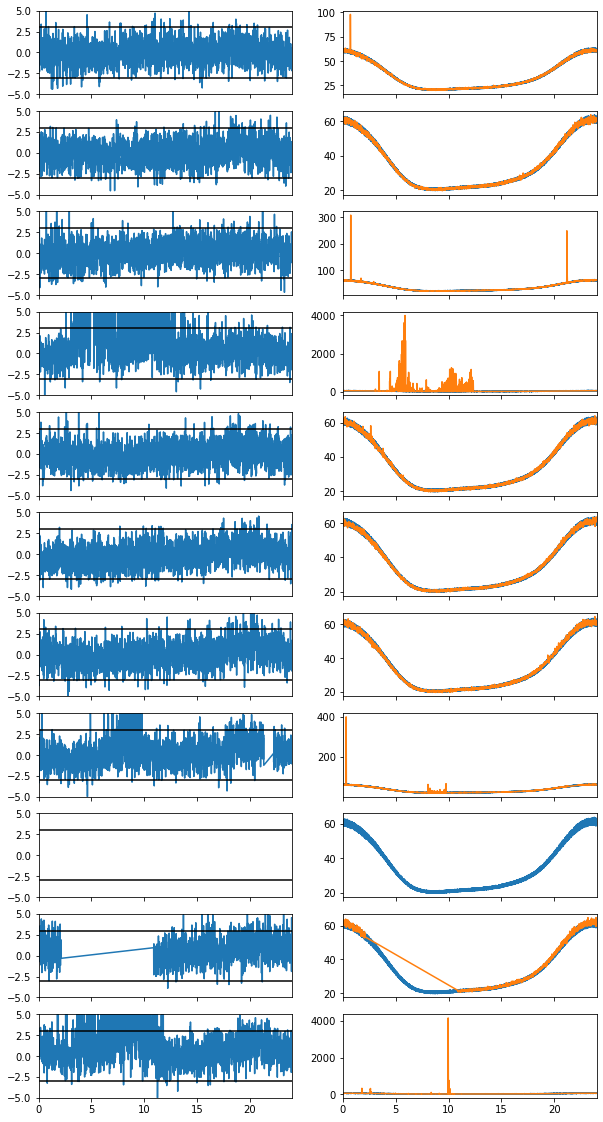

In [20]:
fig, ax = plt.subplots(11, 2, sharex=True, figsize=(10, 20))

for i, fl in enumerate(files[15::10]):
    gha, metric, _ = rms_aggregator.aggregate([fl])
    flags = rms_filt.apply_filter(gha, metric)
    
    ax[i, 0].plot(gha, (metric - rms_filt.metric_model(gha))/rms_filt.std_model(gha))
    ax[i, 0].axhline(3, color='k')
    ax[i, 0].axhline(-3, color='k')
    ax[i, 0].set_ylim(-5, 5)
    
    ax[i, 1].plot(rms_info.gha, np.where(rms_info.flags, np.nan, rms_info.metric))
    ax[i, 1].plot(gha, metric)
    ax[i, 0].set_xlim(0,24)
    ax[i, 1].set_xlim(0,24)
    

Since quite a lot of the time taken is in aggregating the data over frequency, it makes sense to use all files to flag themselves here, I think. But potentially in blocks of ~50 so that more similar days are together.